In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import xarray as xr
import xbudget
import regionate
import xwmt
import xwmb
import xgcm
import CM4Xutils #needed to run pip install nc-time-axis

In [5]:
print('xgcm version', xgcm.__version__, '\nregionate version', regionate.__version__, '\nxwmt version', xwmt.__version__, '\nxwmb version', xwmb.__version__)

xgcm version 0.8.2.dev15+g7492277 
regionate version 0.1.1 
xwmt version 0.3.0 
xwmb version 0.2.1


### Load in data

In [38]:
datadir = lambda x="" : "/vortexfs1/home/anthony.meza/scratch/CM4XTransientTracers/data/model/" + x
ds = xr.open_mfdataset(
        datadir("CM4Xp125_budgets_sigma2_2020-2024.zarr"),
        data_vars="minimal",
        coords="minimal",
        compat="override",
        parallel=True,
        engine="zarr")

In [39]:
ds_3deg = xr.open_mfdataset(
        datadir("CM4Xp125_3deg_budgets_sigma2_2020-2024.zarr"),
        data_vars="minimal",
        coords="minimal",
        compat="override",
        parallel=True,
        engine="zarr")

In [40]:
ds_hires = xr.open_mfdataset(
        datadir("/native_resolution/CM4Xp125_native_resolution_example_2010.zarr"),
        data_vars="minimal",
        coords="minimal",
        compat="override",
        parallel=True,
        engine="zarr")

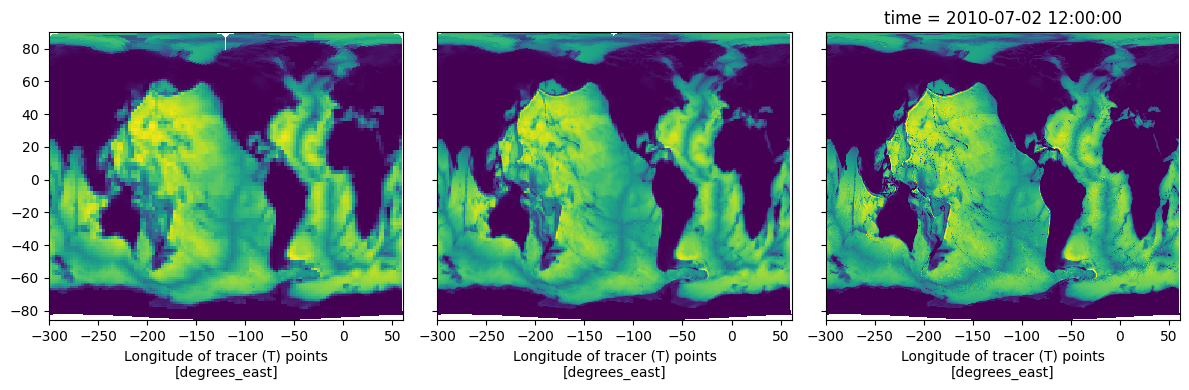

In [52]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (12, 4))


ds_3deg.deptho.plot(x = "geolon", y = "geolat", ax = ax[0], 
                                            add_colorbar = False)
ds.deptho.plot(x = "geolon", y = "geolat", ax = ax[1], 
                                       add_colorbar = False)
ds_hires.deptho.plot(x = "geolon", y = "geolat", ax = ax[2], 
                                       add_colorbar = False)

[x.set_ylabel("") for x in ax]
fig.tight_layout()

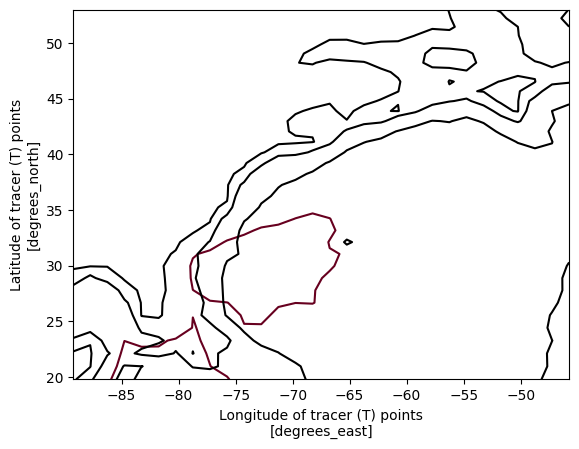

In [133]:
fig, ax = plt.subplots(sharey = True)

zos = ds.zos.mean("time").isel(xh = slice(140, 170), yh = slice(125, 160))
zos.isel(exp = 1).plot.contour(x = "geolon", y = "geolat", ax = ax,
                               levels = np.array([.25]))
zos.deptho.plot.contour(x = "geolon", y = "geolat", levels = [100, 1000, 4000], 
                        colors = "k")


In [94]:
hires_thetao = ds_hires.isel(zl = 0).compute()
hires_thetao = hires_thetao.isel(xh = slice(1750, 2000), yh = slice(1300, 1500))

/vortexfs1/home/anthony.meza/miniforge3/envs/cm4x_analysis/lib/python3.12/site-packages/xarray/plot/dataarray_plot.py:2003: UserWarning: The following kwargs were not used by contour: 'color'
  primitive = ax.contour(x, y, z, **kwargs)


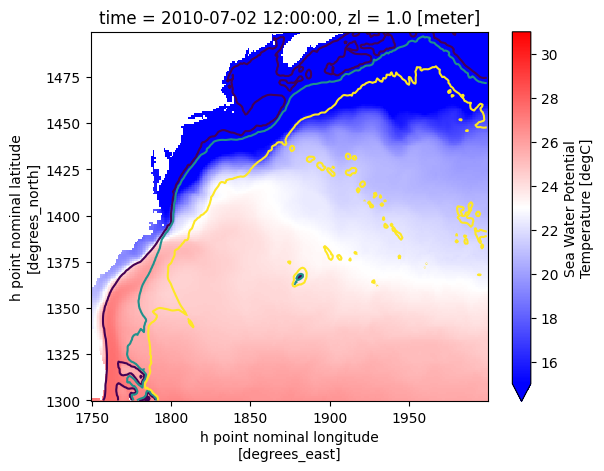

In [96]:
fig, ax = plt.subplots()


hires_thetao.thetao.plot(vmin = 15, vmax = 31,  cmap = "bwr", ax = ax)
hires_thetao.deptho.plot.contour(levels = [100, 1000, 4000], color = "k")
# hires_thetao.deptho.